In [57]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [121]:
import seaborn as sns
import re
import sys
from time import sleep
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns',None)

In [122]:
#import dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_total = pd.concat([df_train,df_test])

In [123]:
df_total.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [124]:
#statistical info
df_total.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [125]:
#datatype info
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [126]:
df_total.shape

(2919, 81)

In [127]:
#check for null values
df_total.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [128]:
#handling the data using method "ffill"
df = df_total.fillna(method="ffill")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [129]:
#Rechecking for null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

<AxesSubplot:>

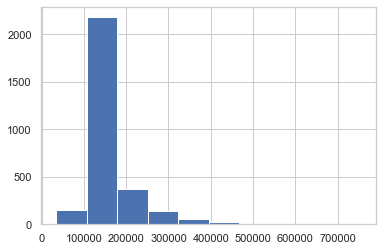

In [130]:
#Visualization of the dataset of single variable 'SalePrice'
df['SalePrice'].hist()

<AxesSubplot:xlabel='SalePrice'>

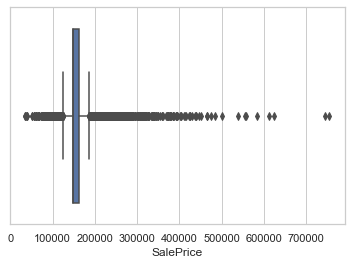

In [131]:
sns.boxplot(df['SalePrice'])

In [132]:
df_total.columns = df_total.columns.str.lower() 
df_train.columns = df_train.columns.str.lower() 

In [133]:
df_total.id = df_total.id.astype('O')

In [134]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
mssubclass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
lotfrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
lotarea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
overallqual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
overallcond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
yearbuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
yearremodadd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
masvnrarea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
bsmtfinsf1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
bsmtfinsf2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


In [135]:
def grab_col_names(dataframe, cat_th=10, car_th=20, show_cols=False):
    """
    Returns the categorical, numerical and categorical but cardinal variables.
    Note: Categorical variables includes numerical values that have low unique values than 10.

    Parameters
    ------
        dataframe: dataframe
                Dataframe that wanted to get column types
        cat_th: int, optional
                Threshold value for the numerical but categorical values
        car_th: int, optinal
                Threshold value for the categorical but cardinal values

    Returns
    ------
        cat_cols: list
                Categorical variables
        num_cols: list
                Numeric variables
        cat_but_car: list
                Categorical but cardinal values

    Examples
    ------
        import seaborn as sns
        df_train = sns.load_dataset("iris")
        print(grab_col_names(df_train))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    if show_cols:
        print(f"""Categorical Variables={cat_cols},\nNumerical Variables={num_cols},\nCategorical but Cardinal Variables={cat_but_car}""")
    
    return cat_cols, num_cols, cat_but_car

In [136]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_total)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 27
cat_but_car: 2
num_but_cat: 10


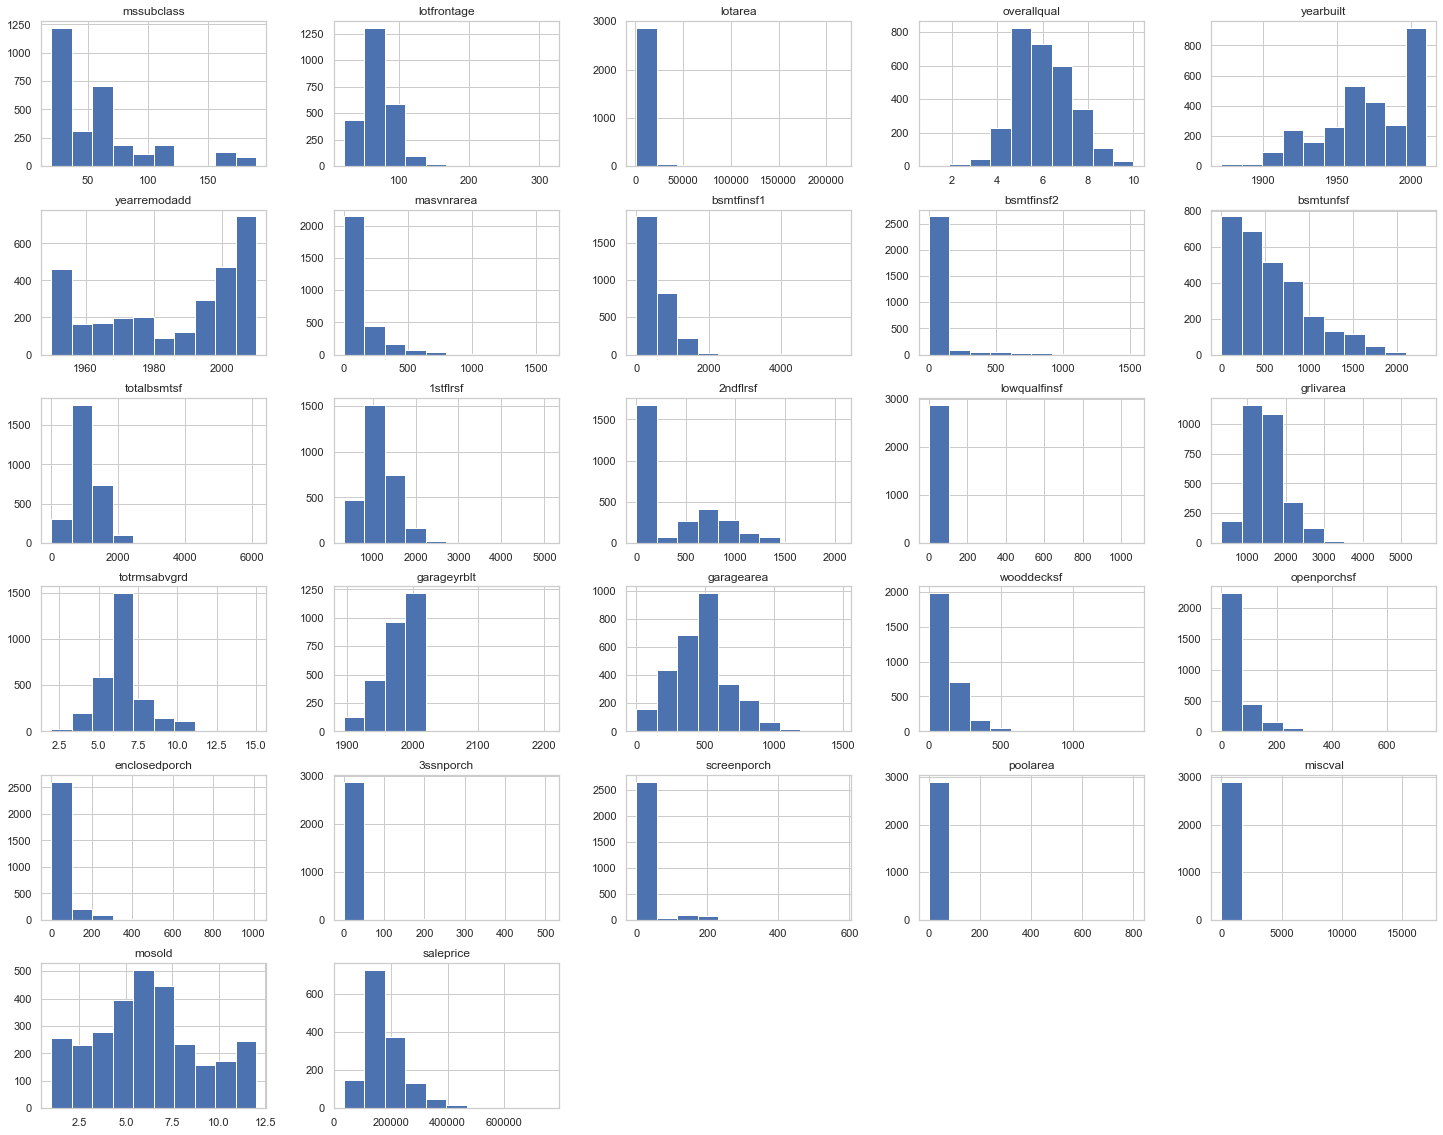

In [137]:
df_total[num_cols].hist(figsize=(25,20))
plt.show()

In [138]:
def dominant_val(dataframe, list_of_columns, percent=0.9, values=False):
    limit = dataframe.shape[0] * percent 
    cols_with_dominance = [col for col in list_of_columns if dataframe[col].value_counts().iloc[0] > limit]
    if values:
        dominant_values = [dataframe[col].value_counts().index[0] for col in cols_with_dominance]
        return zip(cols_with_dominance,dominant_values)
    return cols_with_dominance

In [139]:
most_zero_cols = dominant_val(df_total, num_cols, percent=0.8)
most_zero_cols

['bsmtfinsf2',
 'lowqualfinsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval']

In [140]:
def make_it_binary(dataframe, list_of_columns, value):
    return dataframe[list_of_columns].applymap(lambda x: True if x==value else False)


In [141]:
df_total[most_zero_cols] = make_it_binary(df_total,most_zero_cols,0)

In [142]:
num_cols = [col for col in num_cols if col not in most_zero_cols]

In [143]:
num_cols.remove('saleprice')

In [144]:
len(num_cols)

19

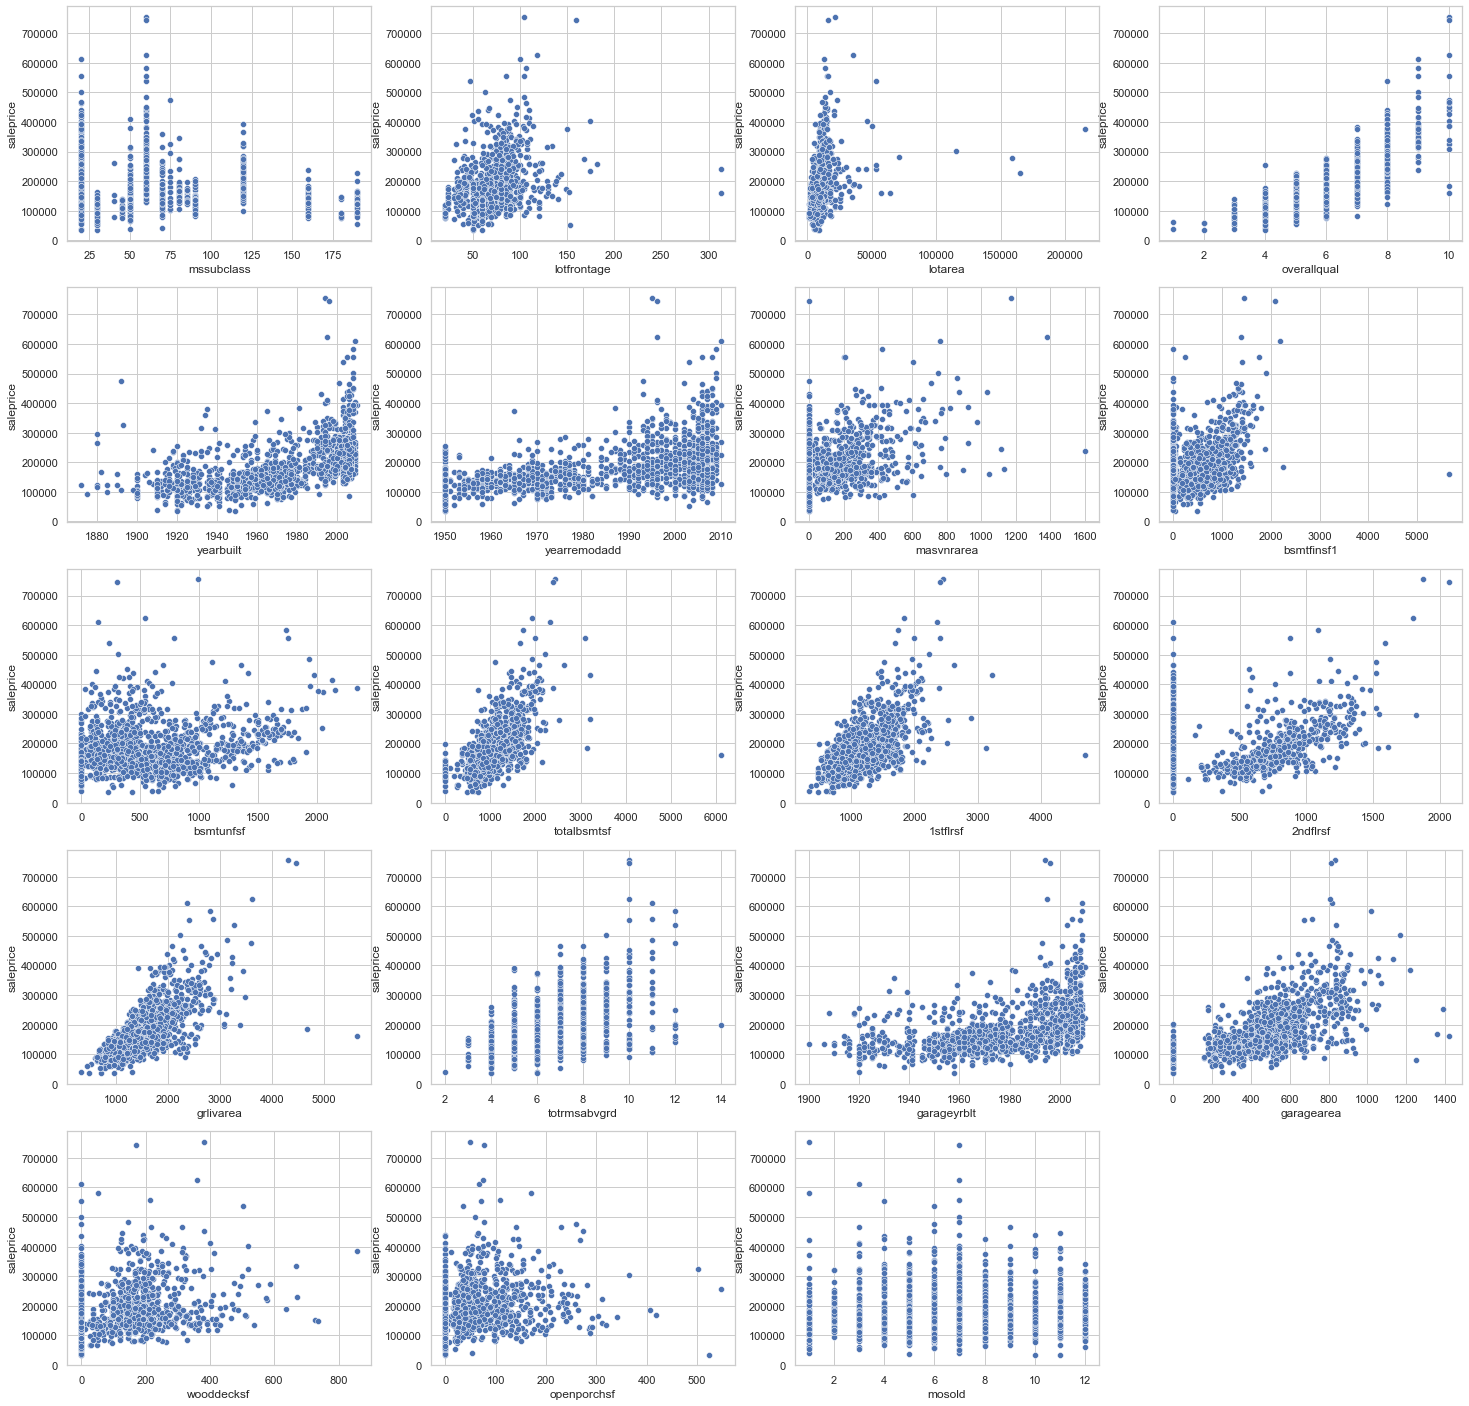

In [145]:
plt.figure(figsize= (25,25))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.scatterplot(x=col, y="saleprice", data=df_train)    

In [146]:
df_total.mssubclass = df_total.mssubclass.astype('category')

In [147]:
drop_list = ['bsmtunfsf','lotarea','lotfrontage']

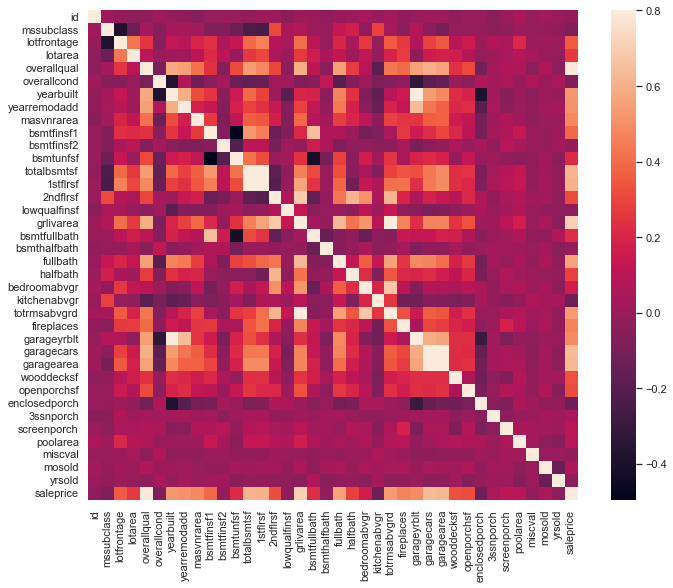

In [148]:
corrmat = df_train.corr()
f,ax =plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

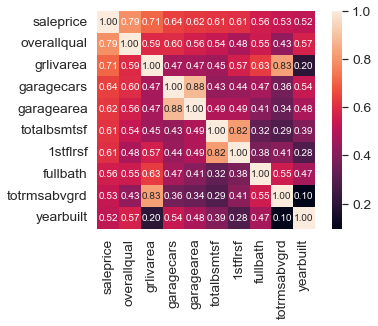

In [149]:
k = 10 #number of variables for heatmap
cols =corrmat.nlargest(k, 'saleprice')['saleprice'].index
cm =np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm =sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [150]:
drop_list += ['totrmsabvgrd','garagearea']

In [151]:
len(cat_cols)

52

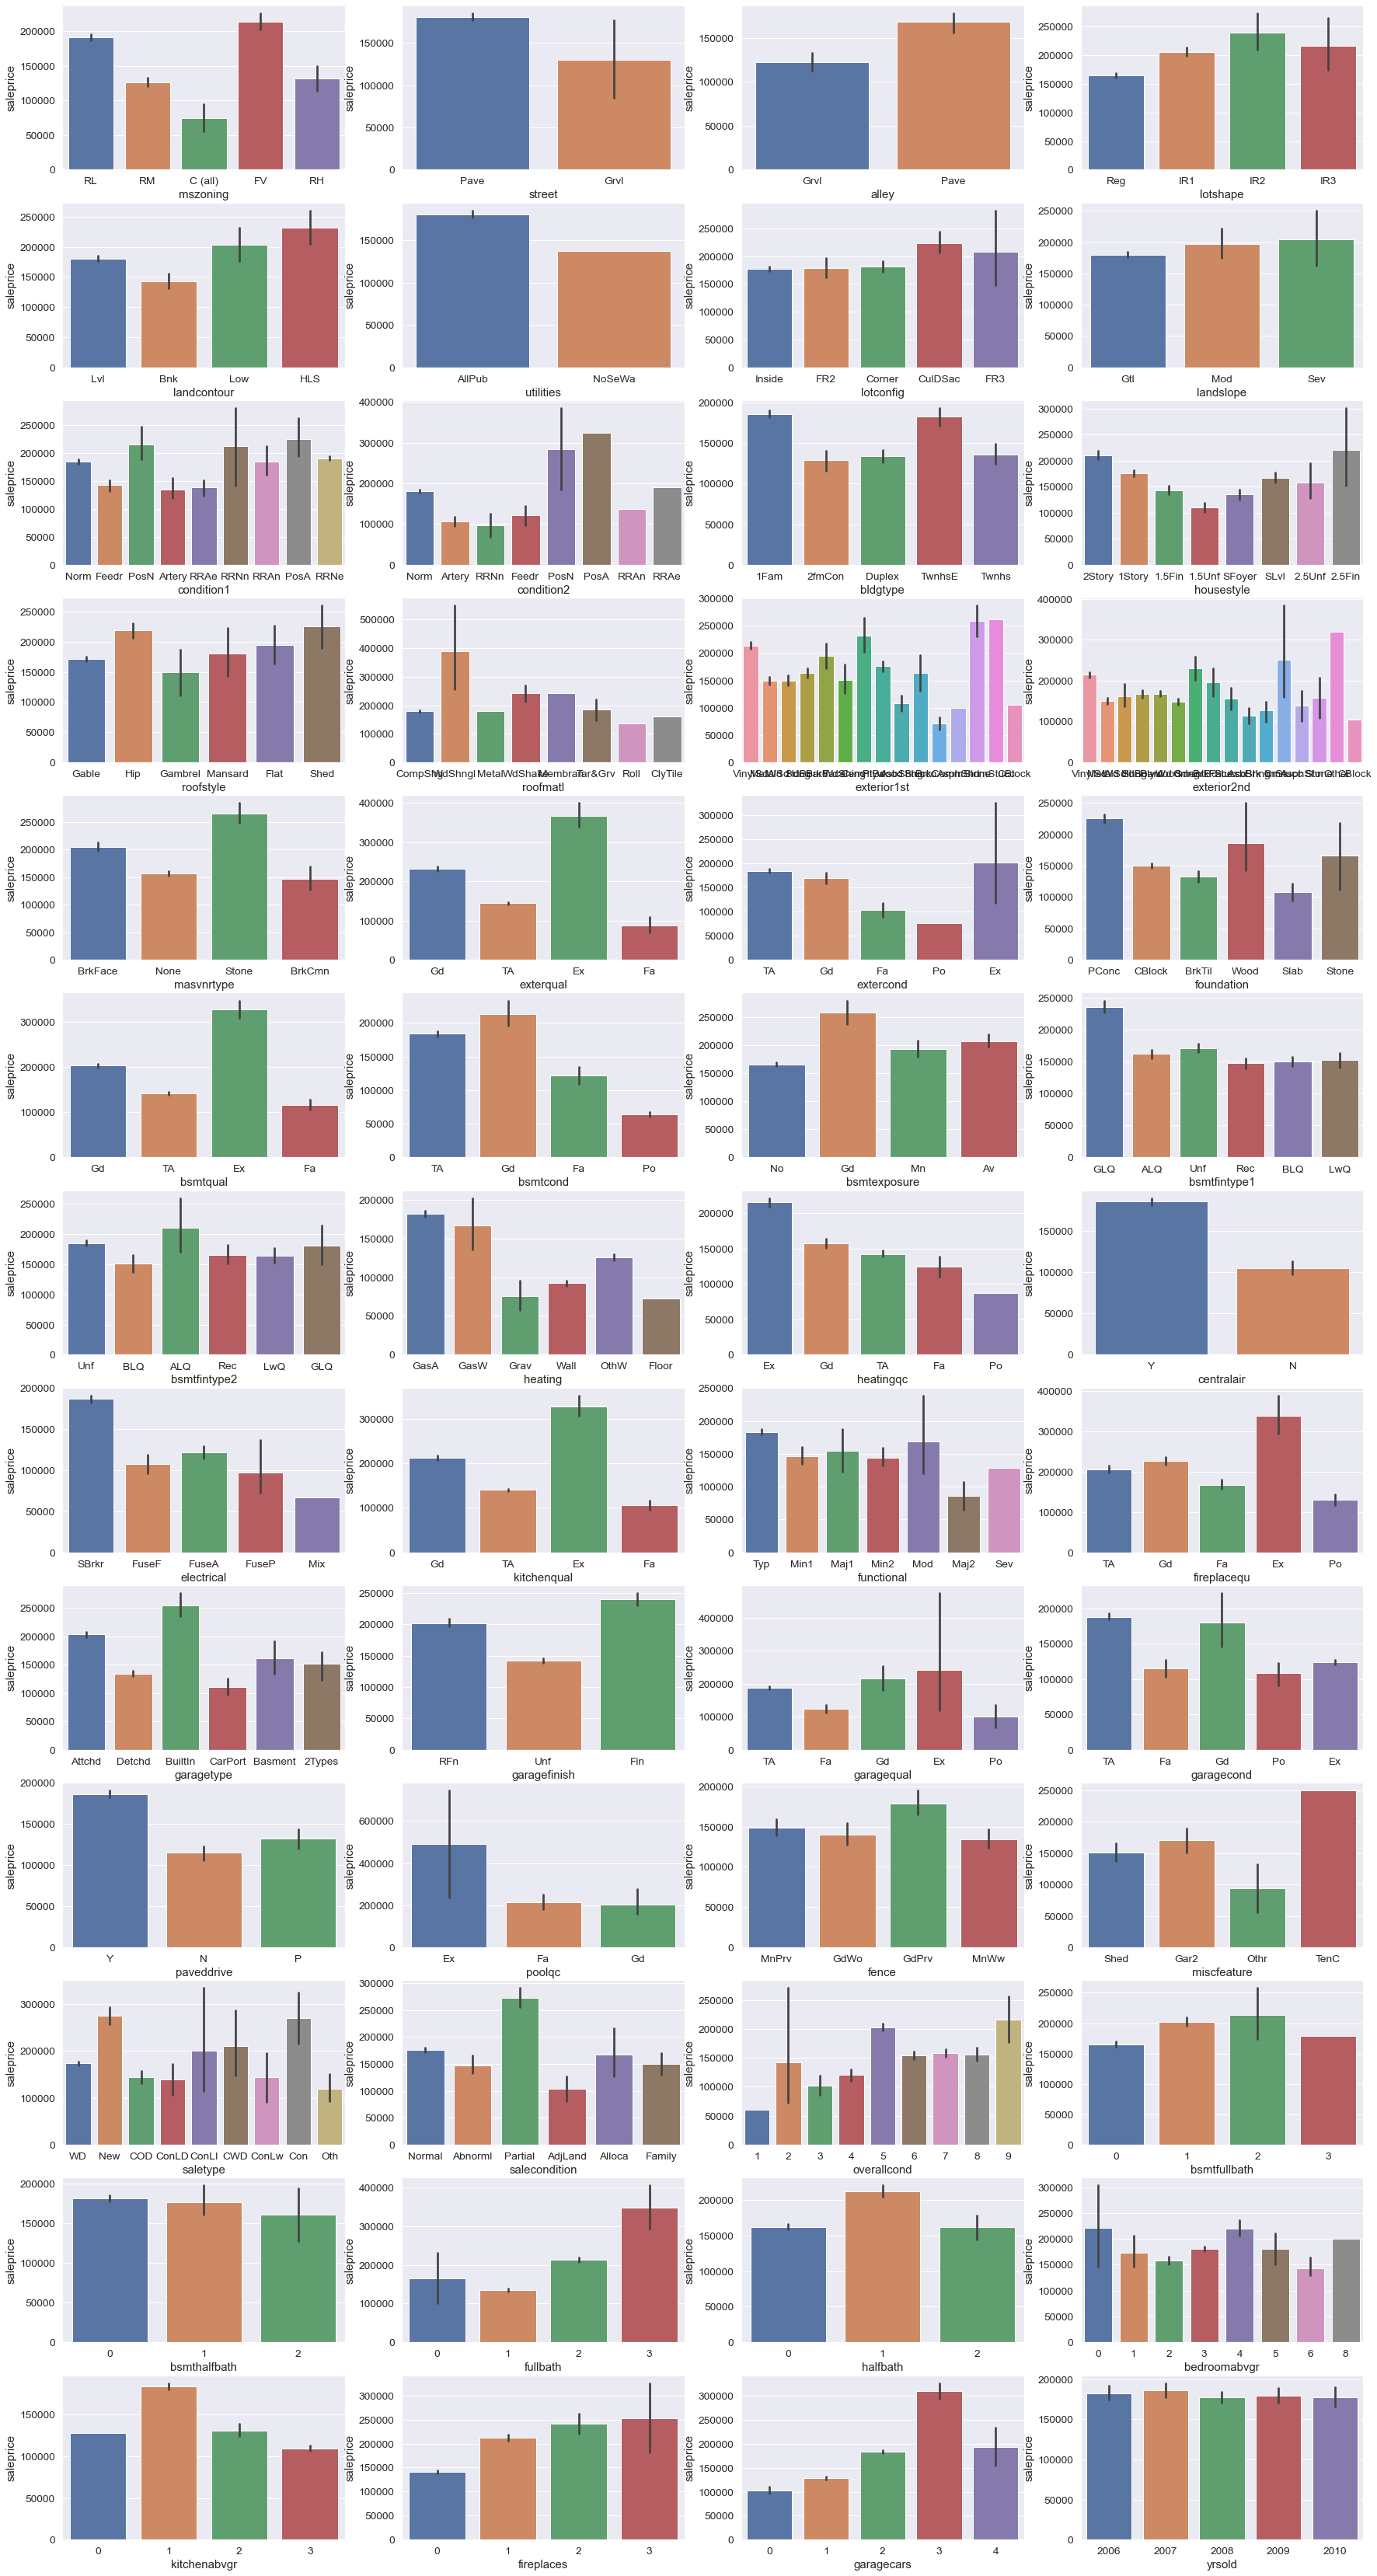

In [152]:
plt.figure(figsize= (30,60))
for i,col in enumerate(cat_cols):
    plt.subplot(13,4,i+1)
    sns.barplot(x=col, y="saleprice", data=df_train)

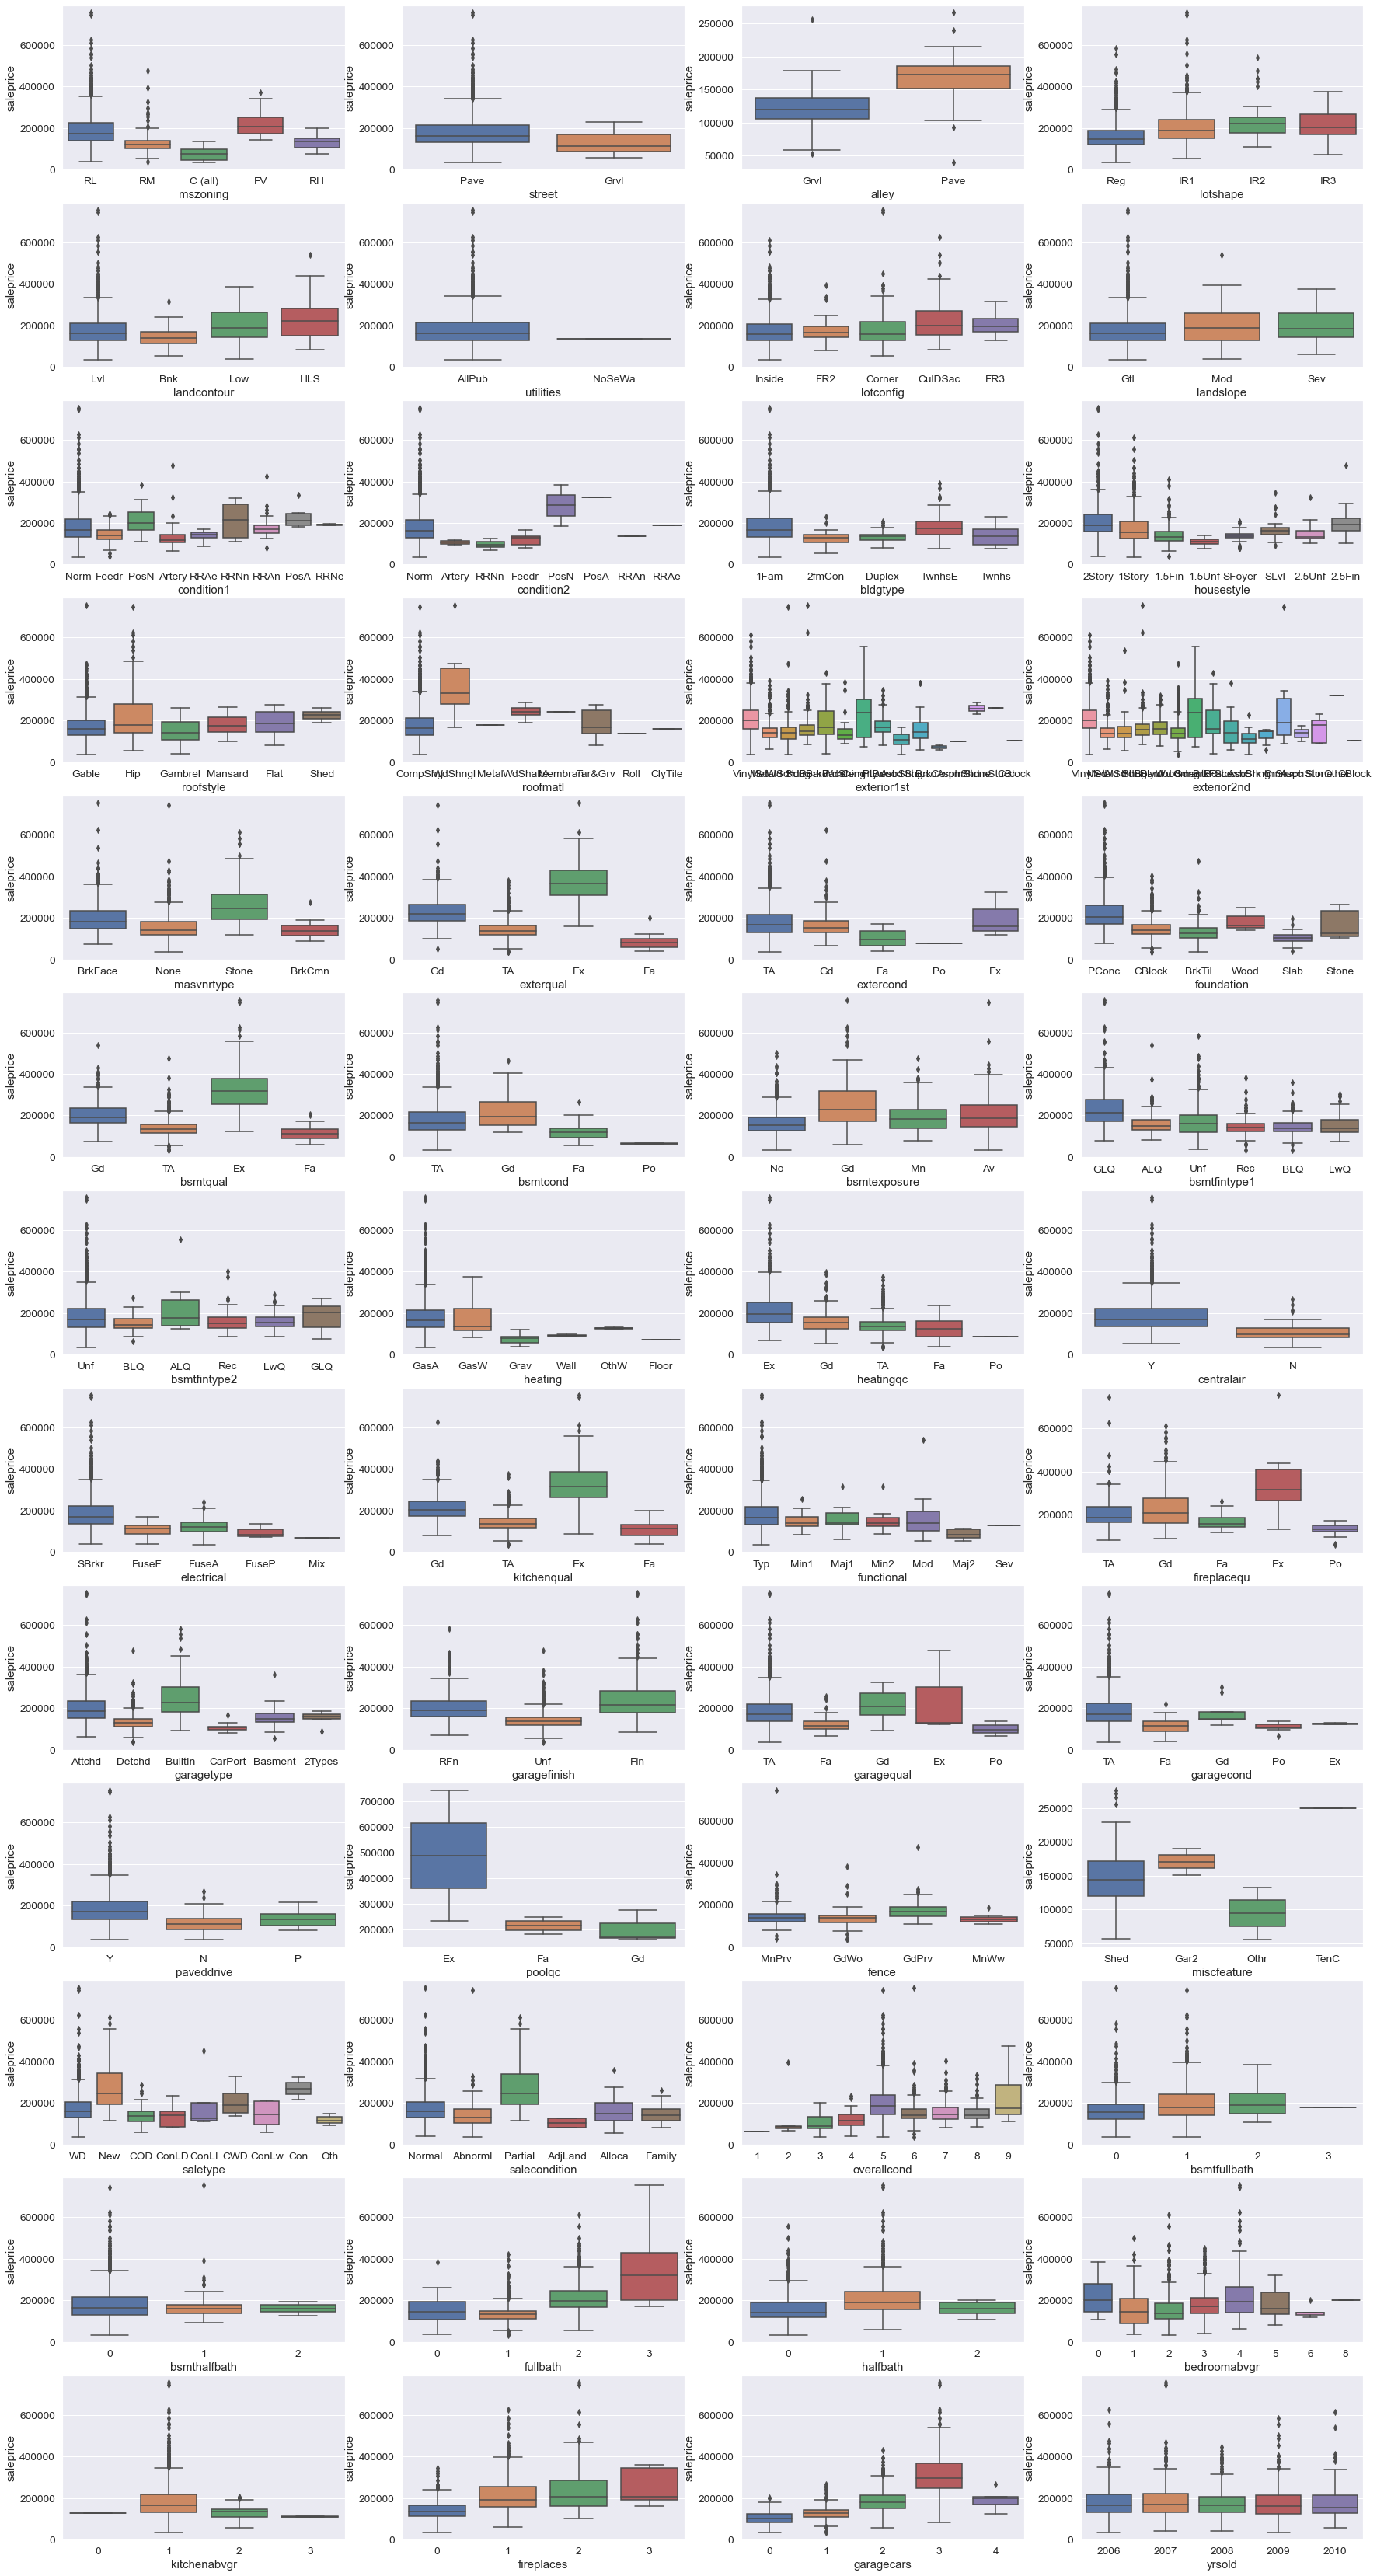

In [153]:
plt.figure(figsize= (30,60))
for i,col in enumerate(cat_cols):
    plt.subplot(13,4,i+1)
    sns.boxplot(x=col, y="saleprice", data=df_train)   

In [154]:
df_total.kitchenabvgr.value_counts()

1    2785
2     129
0       3
3       2
Name: kitchenabvgr, dtype: int64

In [155]:
dominant_zip = dominant_val(df_total,cat_cols,values=True)
dominant_list = list(dominant_zip)

for col,value in dominant_list:
    print(col,value)

street Pave
utilities AllPub
landslope Gtl
condition2 Norm
roofmatl CompShg
heating GasA
centralair Y
electrical SBrkr
functional Typ
garagecond TA
paveddrive Y
bsmthalfbath 0.0
kitchenabvgr 1


In [156]:
for col,value in dominant_list:
    df_total[col] = df_total[col].apply(lambda x: True if x==value else False)

In [157]:
corrmat = df_total[cat_cols].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).abs()

s = pd.DataFrame(corrmat.unstack(),columns=['correlation'])

so = s.sort_values(by='correlation',kind="quicksort",ascending=False)

In [158]:
so[so['correlation']<1].head(10)

,,correlation
exterior2nd,exterior1st,0.753805
exterior1st,exterior2nd,0.753805
fireplacequ,fireplaces,0.719744
fireplaces,fireplacequ,0.719744
kitchenqual,exterqual,0.520337
exterqual,kitchenqual,0.520337
landcontour,landslope,0.493180
landslope,landcontour,0.493180
roofstyle,roofmatl,0.443328
roofmatl,roofstyle,0.443328


In [159]:
drop_list += ['poolqc','exterior2nd','fireplacequ']

In [160]:
cat_but_car

['id', 'neighborhood']

In [161]:
drop_list += cat_but_car

In [162]:
def missing_values_table(dataframe, printer=False, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df_train = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    if printer:
        print(missing_df_train, end="\n")
        
    if na_name:
        return na_columns

In [163]:
df_total.drop(drop_list,inplace=True,axis=0)

In [164]:
missing_values_table(df_total,printer=True)

              n_miss  ratio
miscfeature     2814  96.40
alley           2721  93.22
fence           2348  80.44
saleprice       1459  49.98
garageyrblt      159   5.45
garagequal       159   5.45
garagefinish     159   5.45
garagetype       157   5.38
bsmtcond          82   2.81
bsmtexposure      82   2.81
bsmtqual          81   2.77
bsmtfintype2      80   2.74
bsmtfintype1      79   2.71
masvnrtype        24   0.82
masvnrarea        23   0.79
mszoning           4   0.14
bsmtfullbath       2   0.07
kitchenqual        1   0.03
garagecars         1   0.03
bsmtfinsf1         1   0.03
exterior1st        1   0.03
saletype           1   0.03
totalbsmtsf        1   0.03


In [165]:
no_cols = ["alley","bsmtqual","bsmtcond","bsmtexposure","bsmtfintype1","bsmtfintype2",
           "garagetype","garagefinish","garagequal","garagecond","fence","miscfeature"]

# That Na values replacing with 'No'
for col in no_cols:
    df_total[col].fillna("No",inplace=True)

In [166]:
missing_columns = missing_values_table(df_total,na_name=True)

In [167]:
missing_columns.remove('saleprice')

In [168]:
for col in missing_columns:
    df_total[col].fillna(df_total[col].mode()[0],inplace=True)

In [169]:
missing_values_table(df_total,printer=True)

           n_miss  ratio
saleprice    1459  49.98


In [170]:
cat_cols,  num_cols, cat_but_car = grab_col_names(df_total)

Observations: 2919
Variables: 71
cat_cols: 56
num_cols: 15
cat_but_car: 0
num_but_cat: 28


In [171]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [172]:
df_total = one_hot_encoder(df_total,cat_cols,drop_first=True)

In [173]:
y_train = df_total.loc[~df_total.saleprice.isna(),'saleprice']

In [174]:
y_train = np.log1p(y_train)

In [175]:
X_train = df_total.iloc[:1460].copy()
X_train.drop('saleprice',axis=1,inplace=True)

In [176]:
y_train.max()

13.534474352733596

In [177]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [178]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("LightGBM", LGBMRegressor())]

In [179]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.1576 (LR) 
RMSE: 0.1511 (Ridge) 
RMSE: 0.2048 (Lasso) 
RMSE: 0.1978 (ElasticNet) 
RMSE: 0.2098 (KNN) 
RMSE: 0.216 (CART) 
RMSE: 0.1476 (RF) 
RMSE: 0.1952 (SVR) 
RMSE: 0.1321 (GBM) 
RMSE: 0.1396 (LightGBM) 


In [185]:
lgbm_model = LGBMRegressor(random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model,
                                        X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

rmse

0.13959149417758718

In [186]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               #"colsample_bytree": [0.5, 0.7, 1]
             }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [187]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X_train,y_train)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

rmse

0.1375398361970745

In [188]:
X_test = df_total.iloc[1460:].drop('saleprice',axis=1).copy()

In [189]:
y_pred = final_model.predict(X_test)

y_pred= np.expm1(y_pred)

y_pred

array([121506.05025848, 160674.8360369 , 180722.29354368, ...,
       151677.09890472, 110267.23447881, 227155.34912848])